In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, stats

# **Measure of Position**

### Q1: Read emplyees.csv dataset


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Analytics/employees.csv")

### Q2: Calculate the 10th, 60th, and 90th percentiles of the salary column

> Hint: use np.percentile()




In [ ]:
percentiles = np.percentile(df['salary'], [10, 60, 90])
print("10th Percentile: ", percentiles[0])
print("60th Percentile: ", percentiles[1])
print("90th Percentile: ", percentiles[2])

### Q3: Calculate the quartiles of the salary column

> Hint: use column_name.quantile([])



In [ ]:
quartiles = df['salary'].quantile([0.25, 0.5, 0.75])
print("25th Quartile: ", quartiles[0.25])
print("50th Quartile: ", quartiles[0.5])
print("75th Quartile: ", quartiles[0.75])

### Q4: Calculate the deciles of the salary column

> Hint: use np.percentile()




In [ ]:
deciles = np.percentile(df['salary'], np.arange(10, 100, 10))
for i, decile in enumerate(deciles):
    print(f"{(i+1)*10}th Decile: {decile}")

### Q5: Calculate the z-score of the salary column

In [ ]:
mean = df['salary'].mean()
std = df['salary'].std()
df['z-score'] = (df['salary'] - mean) / std
df['z-score']

# **Outlier Detections**

### Q1: Load the sales dataset


In [ ]:
sales_df = pd.read_csv('/content/sales_data_ lab6.csv')

### Q2: Visual the sales amount feature using histogram chart


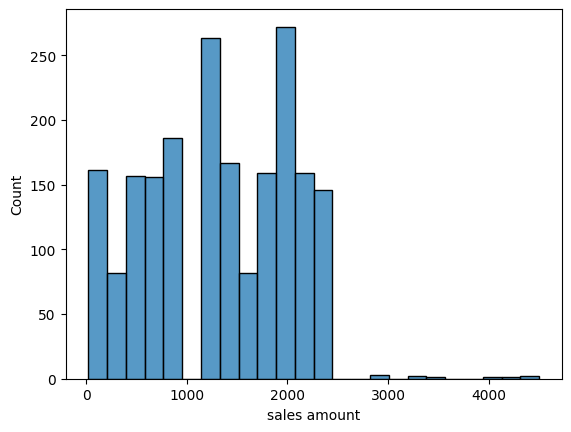

In [ ]:
sns.histplot(sales_df['sales amount'])
plt.show()

### Q3: Check if there is outlier in 'sales amount' feature or not based on Z-score method


In [ ]:
mean = sales_df['sales amount'].mean()
std = sales_df['sales amount'].std()
sales_df['z_score'] = (sales_df['sales amount'] - mean) / std

In [ ]:
sales_df['outlier_zscore'] = sales_df[(sales_df['z_score'] > 3) | (sales_df['z_score'] < -3)]
outliers_zscore = sales_df[sales_df['outlier_zscore'] == True]
outliers_zscore

,customer ID,product ID,transaction ID,date of purchase,sales amount,z_score,outlier_zscore
149,AB0424,P01012,Tr85103,2/28/2023,4500,4.486800,True
243,AB0420,P01011,Tr85197,2/9/2023,4200,4.064532,True
441,AB1228,P01010,Tr85395,2/4/2023,4500,4.486800,True
488,AB0595,P01013,Tr85442,1/25/2023,4000,3.783020,True


### Q4: Check if there is outlier in 'sales amount' feature or not based on IRQ method

In [ ]:
# IQR method
q1 = sales_df['sales amount'].quantile(0.25)
q3 = sales_df['sales amount'].quantile(0.75)
iqr = q3 - q1
sales_df['outlier_iqr'] = ((sales_df['sales amount'] < (q1 - 1.5 * iqr)) | (sales_df['sales amount'] > (q3 + 1.5 * iqr)))

outliers_iqr = sales_df[sales_df['outlier_iqr'] == True]
outliers_iqr

,customer ID,product ID,transaction ID,date of purchase,sales amount,z_score,outlier_zscore,outlier_iqr
149,AB0424,P01012,Tr85103,2/28/2023,4500,4.486800,True,True
243,AB0420,P01011,Tr85197,2/9/2023,4200,4.064532,True,True
441,AB1228,P01010,Tr85395,2/4/2023,4500,4.486800,True,True
488,AB0595,P01013,Tr85442,1/25/2023,4000,3.783020,True,True


### Q5: Check if there is outliers in 'sales amount' feature using box plot 

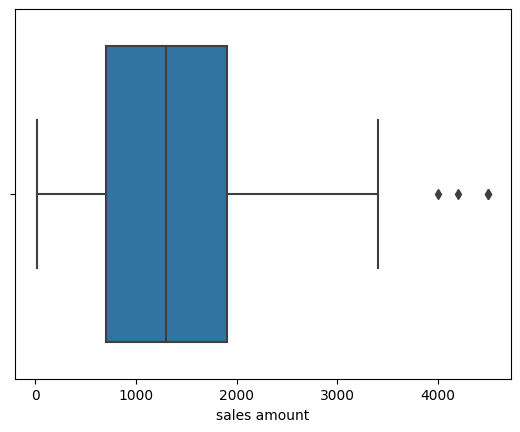

In [ ]:
# Box plot
sns.boxplot(x=sales_df['sales amount'])
plt.show()


### Q6: Check if there is outliers in 'sales amount' feature using density plot

> Hint: use sns.kdeplot()



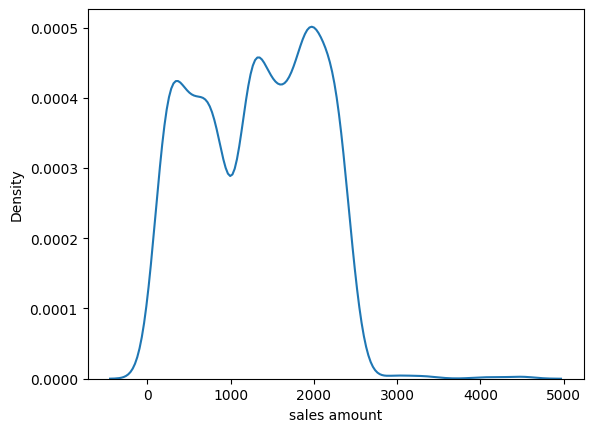

In [ ]:
# Density plot
sns.kdeplot(sales_df['sales amount'])
plt.show()

# **Contingency Table**

### Q1: Load employee_satisfaction.csv dataset


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Analytics/employee_satisfaction.csv')

### Q2: Create a contingency table using pd.crosstab()


In [ ]:
contingency_table = pd.crosstab(
    index=data['Job security'],
    columns=data['Compensation'],
    margins=True
)
contingency_table

Compensation,1,2,3,4,5,All
Job security,,,,,,
1,31,36,49,47,40,203
2,37,42,53,38,36,206
3,43,35,37,33,31,179
4,46,49,41,45,43,224
5,38,30,32,41,47,188
All,195,192,212,204,197,1000


### Q3: Calculate marginal totals for each variable

> Hint: use .sum()




In [ ]:
marginal_totals = data[['Job security', 'Compensation', 'Benefits', 'Work-life balance', 'Career development']].sum()
marginal_totals

Job security          2988
Compensation          3016
Benefits              2981
Work-life balance     2980
Career development    2976
dtype: int64

### Q4: Calculate row percentages


In [ ]:
row_percentages = data[['Job security', 'Compensation', 'Benefits', 'Work-life balance', 'Career development']].apply(lambda x: x.value_counts(normalize=True) * 100)
row_percentages

,Job security,Compensation,Benefits,Work-life balance,Career development
1,20.3,19.5,20.0,21.2,19.2
2,20.6,19.2,19.4,18.5,21.6
3,17.9,21.2,21.9,20.2,20.0
4,22.4,20.4,19.9,21.3,20.8
5,18.8,19.7,18.8,18.8,18.4


In [ ]:
data.iloc[1].value_counts(normalize=True)

### Q5: Calculate column percentages


In [ ]:
column_percentages = data[['Job security', 'Compensation', 'Benefits', 'Work-life balance', 'Career development']].apply(lambda x: x.groupby(x).count() / len(df) * 100)
column_percentages

,Job security,Compensation,Benefits,Work-life balance,Career development
1,244.578313,234.939759,240.963855,255.421687,231.325301
2,248.192771,231.325301,233.734940,222.891566,260.240964
3,215.662651,255.421687,263.855422,243.373494,240.963855
4,269.879518,245.783133,239.759036,256.626506,250.602410
5,226.506024,237.349398,226.506024,226.506024,221.686747


In [ ]:
# Calculate average satisfaction rating
average_satisfaction = data[['Job security', 'Compensation', 'Benefits', 'Work-life balance', 'Career development']].mean().mean()
print("Average Satisfaction Rating:", average_satisfaction)

Average Satisfaction Rating: 2.9882
